In [1]:
import pandas as pd

In [2]:
# load pre-processed dataset
df = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/pre_processed_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25568 entries, 0 to 25567
Columns: 185 entries, Quantity Sold (kilo) to Category Name_Solanum
dtypes: bool(183), float64(2)
memory usage: 4.9 MB


In [3]:
df.sample(3)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 Colour Pepper,Item Name_Agaricus Bisporus,Item Name_Aihao,Item Name_Amaranth,Item Name_Amaranth,Item Name_Apricot Bao Mushroom,Item Name_Basil,Item Name_Bell Pepper,...,Item Name_Zhijiang Red Bolt,Item Name_Zhimaxiancai,Item Name_Zhuyecai,Item Name_Zhuyecai,Category Name_Aquatic Tuberous Vegetables,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower/Leaf Vegetables,Category Name_Solanum
6437,0.340000,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7470,0.292308,12.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
12295,0.457895,8.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [4]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
# define dependent and non dependent variables
y = df['Quantity Sold (kilo)']
x = df.drop(columns=['Quantity Sold (kilo)'], axis=1)

# split the dataset 0.8, 0.1, 0.1
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# convert to tensor arrays
x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
x_eval_tensor = tf.constant(x_eval, dtype=tf.float32)
y_eval_tensor = tf.constant(y_eval, dtype=tf.float32)

x_train_tensor.shape, x_eval_tensor.shape, x_test.shape

2023-12-10 17:59:02.010955: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-12-10 17:59:02.010975: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-10 17:59:02.010980: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-10 17:59:02.011101: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-10 17:59:02.011326: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([20454, 184]), TensorShape([2557, 184]), (2557, 184))

In [6]:
# save testing dataset
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/testing_dataset.csv')
df_test.sample(5)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 Colour Pepper,Item Name_Agaricus Bisporus,Item Name_Aihao,Item Name_Amaranth,Item Name_Amaranth,Item Name_Apricot Bao Mushroom,Item Name_Basil,Item Name_Bell Pepper,...,Item Name_Zhijiang Red Bolt,Item Name_Zhimaxiancai,Item Name_Zhuyecai,Item Name_Zhuyecai,Category Name_Aquatic Tuberous Vegetables,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower/Leaf Vegetables,Category Name_Solanum
483,0.433333,19.8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2442,1.000000,3.9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1041,0.623288,7.2,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2214,0.449254,12.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2063,1.000000,2.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [7]:
# convert to tensor arrays
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

In [8]:
# model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(184, activation='relu', input_shape=(x_train_tensor.shape[1],)))
model.add(tf.keras.layers.Reshape((1, 184))) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 20

# train model and get history
history = model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/20


2023-12-10 17:59:03.749370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-12-10 17:59:03.835958: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


640/640 [==============================] - 12s 16ms/step - loss: 0.2043 - mae: 0.2043 - val_loss: 0.1388 - val_mae: 0.1388
Epoch 2/20
640/640 [==============================] - 10s 15ms/step - loss: 0.0919 - mae: 0.0919 - val_loss: 0.0801 - val_mae: 0.0801
Epoch 3/20
640/640 [==============================] - 10s 16ms/step - loss: 0.0705 - mae: 0.0705 - val_loss: 0.0718 - val_mae: 0.0718
Epoch 4/20
640/640 [==============================] - 10s 15ms/step - loss: 0.0666 - mae: 0.0666 - val_loss: 0.0698 - val_mae: 0.0698
Epoch 5/20
640/640 [==============================] - 10s 15ms/step - loss: 0.0655 - mae: 0.0655 - val_loss: 0.0692 - val_mae: 0.0692
Epoch 6/20
640/640 [==============================] - 9s 15ms/step - loss: 0.0637 - mae: 0.0637 - val_loss: 0.0787 - val_mae: 0.0787
Epoch 7/20
640/640 [==============================] - 10s 15ms/step - loss: 0.0636 - mae: 0.0636 - val_loss: 0.0694 - val_mae: 0.0694
Epoch 8/20
640/640 [==============================] - 10s 15ms/step - loss

In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

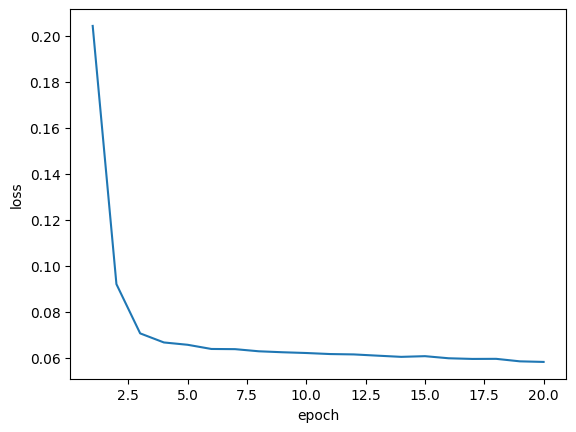

In [12]:
# plot loss with respect to epoch number
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')

In [13]:
# final model with optimized epoch number
final_model = tf.keras.Sequential()
final_model.add(tf.keras.layers.Dense(184, activation='relu', input_shape=(x_train_tensor.shape[1],)))
final_model.add(tf.keras.layers.Reshape((1, 184))) 
final_model.add(tf.keras.layers.LSTM(128, return_sequences=True))
final_model.add(tf.keras.layers.Dense(128, activation='relu'))
final_model.add(tf.keras.layers.Dense(64, activation='relu'))
final_model.add(tf.keras.layers.LSTM(32))
final_model.add(tf.keras.layers.Dense(1, activation='linear'))

final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 19

history = final_model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/19


2023-12-10 18:02:19.770110: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


640/640 [==============================] - 11s 15ms/step - loss: 0.2073 - mae: 0.2073 - val_loss: 0.1450 - val_mae: 0.1450
Epoch 2/19
640/640 [==============================] - 9s 15ms/step - loss: 0.0939 - mae: 0.0939 - val_loss: 0.0802 - val_mae: 0.0802
Epoch 3/19
640/640 [==============================] - 10s 15ms/step - loss: 0.0719 - mae: 0.0719 - val_loss: 0.0790 - val_mae: 0.0790
Epoch 4/19
640/640 [==============================] - 9s 15ms/step - loss: 0.0669 - mae: 0.0669 - val_loss: 0.0711 - val_mae: 0.0711
Epoch 5/19
640/640 [==============================] - 9s 15ms/step - loss: 0.0650 - mae: 0.0650 - val_loss: 0.0688 - val_mae: 0.0688
Epoch 6/19
640/640 [==============================] - 10s 15ms/step - loss: 0.0641 - mae: 0.0641 - val_loss: 0.0689 - val_mae: 0.0689
Epoch 7/19
640/640 [==============================] - 10s 15ms/step - loss: 0.0632 - mae: 0.0632 - val_loss: 0.0715 - val_mae: 0.0715
Epoch 8/19
640/640 [==============================] - 10s 15ms/step - loss: 

In [14]:
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 184)               34040     
                                                                 
 reshape_1 (Reshape)         (None, 1, 184)            0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            160256    
                                                                 
 dense_5 (Dense)             (None, 1, 128)            16512     
                                                                 
 dense_6 (Dense)             (None, 1, 64)             8256      
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                

In [15]:
# view loss for testing values
final_model.evaluate(x_test_tensor, y_test_tensor)

80/80 [==============================] - 1s 7ms/step - loss: 0.0603 - mae: 0.0603


[0.06033642217516899, 0.06033642217516899]

In [16]:
# predict sample value set
y_predictions = final_model.predict(x_test_tensor)
y_predictions[:5]

80/80 [==============================] - 1s 6ms/step


array([[0.22939107],
       [1.0108167 ],
       [0.54042804],
       [0.21148407],
       [0.42360643]], dtype=float32)

In [17]:
# view actual values
y_test_tensor[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.26666668, 1.        , 0.59      , 0.18333334, 0.36666667],
      dtype=float32)>

In [18]:
# save final model
final_model.save('final_sold_amount_model')

INFO:tensorflow:Assets written to: final_sold_amount_model/assets


INFO:tensorflow:Assets written to: final_sold_amount_model/assets
